In [11]:
import pandas as pd
import numpy as np
import altair as alt
import plotly.graph_objects as go

# Constants
BLUE = '#006BA2'
CYAN = '#3EBCD2'
GREEN = '#379A8B'
YELLOW = '#EBB434'
OLIVE = '#B4BA39'
PURPLE = '#9A607F'
RED = '#DB444B'
GOLD = '#D1B07C'
GREY =  '#758D99'
BLUE_LIGHT = '#98DAFF'
BLUE_DARK = '#00588D'
CYAN_LIGHT = '#6FE4FB'
CYAN_DARK = '#005F73'
GREEN_LIGHT = '#86E5D4'
GREEN_DARK = '#005F52'
YELLOW_LIGHT = '#FFCB4D'
YELLOW_DARK = '#714C00'
OLIVE_LIGHT = '#D7DB5A'
OLIVE_DARK = '#4C5900'
PURPLE_LIGHT = '#FFC2E3'
PURPLE_DARK = '#78405F'
RED_LIGHT = '#FFA39F'
RED_DARK = '#A81829'
GOLDLIGHT = '#F2CF9A'
GOLD_DARK = '#674E1F'

In [3]:
df = pd.read_csv('stili_al.csv')

### Functions

In [98]:
def group_df(df, metric: str) -> pd.Series:
    # group for a bar chart
    s = (df
            .groupby(metric)
            .count()
        ).country.sort_values()
    return s




def make_bars_plotly(input_color, s: pd.Series, fixed_order_flag_freq=False, fixed_order_flag_camb=False, width=800, height=600):
    
    color_map = {
        'blue': BLUE,
        'cyan': CYAN,
        'green': GREEN,
        'yellow': YELLOW,
        'red': RED,
        'olive': OLIVE,
        'purple': PURPLE,
        'gold': GOLD
    }
    chart_color = color_map.get(input_color, 'blue')  # Default to blue if color not found
  
    # Fixed order for the bars
    if fixed_order_flag_freq:
        fixed_order = [
        'Tutti i giorni o quasi', '2-3 volte a settimana', '1 volta a settimana', 
        '2-3 volte al mese', '1 volta al mese', "4-5 volte all’anno", 
        'Più raramente', 'Mai'
        ][::-1]
        s = s.reindex(fixed_order)

    if fixed_order_flag_camb:
        fixed_order = [
            "Molto aumentato", "Un po’ aumentato", "Uguale",
            "Un po’ diminuito", "Molto diminuito"
        ][::-1]
        s = s.reindex(fixed_order)
        



    # Calculate percentages
    total = s.sum()
    percentages = (s / total * 100).round(1).astype(str) + '%'

    fig = go.Figure(go.Bar(
        x=s.values,
        y=s.index,
        orientation='h',
        marker=dict(color=chart_color),
        text=percentages,
        textposition='auto',
    ))

    # Update layout for a cleaner look
    fig.update_layout(
        #title=title,
        xaxis=dict(
            showticklabels=True,
            showgrid=True,
            tickangle=0,
            titlefont=dict(size=12),
            title_standoff=25
        ),
        yaxis=dict(
            showgrid=False,
            showline=False,
            linecolor='black'
        ),
        plot_bgcolor='white',
        showlegend=False,
        width=width,
        height=height,
    )

    fig.update_yaxes(tickfont=dict(size=12), tickmode='array', tickvals=list(s.index))
    fig.update_xaxes(tickfont=dict(size=12))

    return fig

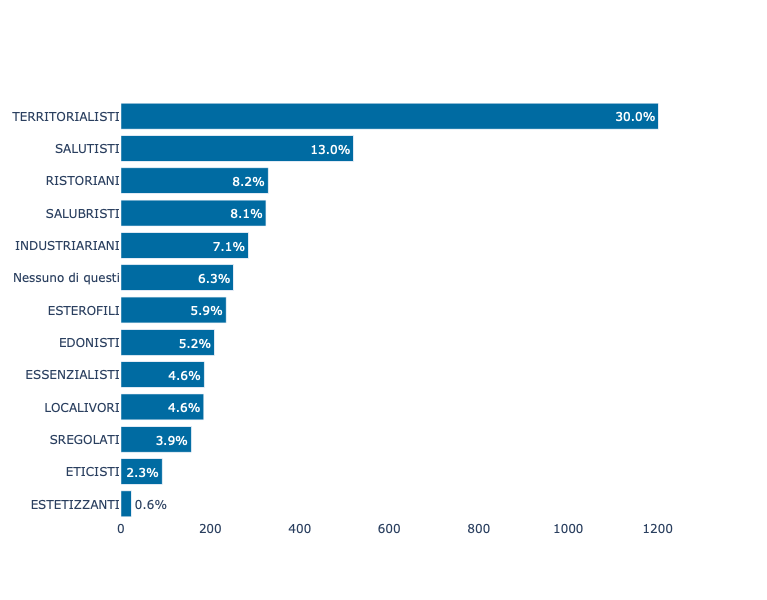

In [99]:
selected_color_theme = 'blue'
selected_country = 'Italia'
df_filtered = df.query('country == @selected_country')
selected_metric = 'stile'
metric_series = group_df(df_filtered, selected_metric)
fig = make_bars_plotly(selected_color_theme, metric_series, fixed_order_flag_freq=False)
fig

In [132]:
df_filtered

,id__,country,regio,s3,anni,area,s5,q3ter,q4__4,q4__5,...,q4__10,q5__4,q5__5,q5__6,q5__7,q5__8,q5__9,q5__10,eta,stile
0,33,Italia,Lombardia,Maschio,55,Nord Ovest,Solo io,LOCALIVORI: danno priorità ai prodotti km0 e a...,4-5 volte all’anno,4-5 volte all’anno,...,Più raramente,Uguale,Uguale,Uguale,Uguale,Uguale,Uguale,Uguale,55-64,LOCALIVORI
1,34,Italia,Puglia,Maschio,23,Sud e Isole,Solo io,SALUTISTI: sono molto attenti a un’alimentazio...,1 volta al mese,1 volta al mese,...,1 volta al mese,Uguale,Uguale,Un po’ aumentato,Uguale,Uguale,Uguale,Uguale,20-24,SALUTISTI
2,35,Italia,Liguria,Maschio,23,Nord Ovest,Soprattutto io,EDONISTI: persone che ricercano l’esperienza g...,2-3 volte al mese,1 volta al mese,...,2-3 volte al mese,Uguale,Un po’ aumentato,Uguale,Uguale,Uguale,Un po’ aumentato,Uguale,20-24,EDONISTI
3,36,Italia,Abruzzo,Femmina,60,Sud e Isole,Soprattutto io,Nessuno di questi,2-3 volte a settimana,2-3 volte a settimana,...,2-3 volte a settimana,Molto aumentato,Molto aumentato,Molto aumentato,Molto aumentato,Molto aumentato,Molto aumentato,Molto aumentato,55-64,Nessuno di questi
4,37,Italia,Friuli Venezia Giulia,Maschio,24,Nord Est,Soprattutto io,TERRITORIALISTI: consumano spesso a casa piatt...,1 volta a settimana,1 volta a settimana,...,1 volta a settimana,Uguale,Uguale,Uguale,Uguale,Uguale,Uguale,Uguale,20-24,TERRITORIALISTI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,3890,USA,"Mountain (Arizona, Colorado, Idaho, Montana, N...",Maschio,52,NaN,Solo io,Nessuno di questi,1 volta al mese,2-3 volte al mese,...,2-3 volte al mese,Uguale,Uguale,Uguale,Uguale,Uguale,Uguale,Uguale,45-54,Nessuno di questi
8012,3891,USA,"Pacific (Alaska, California, Hawaii, Oregon, a...",Maschio,46,NaN,Solo io,SALUTISTI: sono molto attenti a un’alimentazio...,2-3 volte al mese,2-3 volte al mese,...,2-3 volte al mese,Uguale,Uguale,Un po’ diminuito,Molto aumentato,Un po’ aumentato,Un po’ aumentato,Molto diminuito,45-54,SALUTISTI
8013,3907,USA,"West North Central (Iowa, Kansas, Minnesota, M...",Maschio,47,NaN,Solo io,SALUTISTI: sono molto attenti a un’alimentazio...,1 volta a settimana,1 volta al mese,...,1 volta a settimana,Uguale,Un po’ diminuito,Un po’ aumentato,Uguale,Un po’ aumentato,Un po’ diminuito,Un po’ aumentato,45-54,SALUTISTI
8014,3912,USA,"West North Central (Iowa, Kansas, Minnesota, M...",Maschio,45,NaN,Soprattutto io,RISTORIANI: consumano molto frequentemente in ...,Più raramente,Più raramente,...,2-3 volte al mese,Uguale,Uguale,Molto diminuito,Uguale,Uguale,Uguale,Un po’ diminuito,45-54,RISTORIANI


In [160]:
selected_countries = ['Italia', 'USA', ]
#selected_countries = ['Italia']
df_filtered = df.query('country in @selected_countries')
grouped = df_filtered.groupby(['country', 'stile']).country.count().sort_values()


grouped

country  stile            
USA      LOCALIVORI             20
         ESTETIZZANTI           22
Italia   ESTETIZZANTI           24
USA      ETICISTI               32
         SALUBRISTI             61
         EDONISTI               84
Italia   ETICISTI               92
USA      ESSENZIALISTI         130
         ESTEROFILI            136
         SREGOLATI             146
Italia   SREGOLATI             157
USA      Nessuno di questi     165
Italia   LOCALIVORI            185
         ESSENZIALISTI         186
         EDONISTI              209
USA      TERRITORIALISTI       229
Italia   ESTEROFILI            235
         Nessuno di questi     252
         INDUSTRIARIANI        285
USA      SALUTISTI             290
         INDUSTRIARIANI        291
Italia   SALUBRISTI            324
         RISTORIANI            329
USA      RISTORIANI            408
Italia   SALUTISTI             520
         TERRITORIALISTI      1202
Name: country, dtype: int64

In [163]:
def make_bars_plotly(input_color, s: pd.Series, width=800, height=600):
    
    color_map = {
        'blue': BLUE,
        'cyan': CYAN,
        'green': GREEN,
        'yellow': YELLOW,
        'red': RED,
        'olive': OLIVE,
        'purple': PURPLE,
        'gold': GOLD
    }
    chart_color = color_map.get(input_color, 'blue')  # Default to blue if color not found
    country_colors = {'Italia': OLIVE, 'Germania': YELLOW, 'Francia': BLUE, 'USA': RED }
    
    # Calculate percentages
    #total = s.sum()
    #percentages = (s / total * 100).round(1).astype(str) + '%'
    
    fig = go.Figure()
    
    for country in s.index.levels[0]:
        country_data = s[country]
        country_total = country_data.sum()
        country_percentages = (country_data / country_total * 100).round(2)
        
        #country_percentages = percentages[country].values
        fig.add_trace(go.Bar(
            x=country_percentages.values,
            y=country_data.index,
            orientation='h',
            marker=dict(color=country_colors[country]),
            text=country_percentages.apply(lambda x: f'{x}%'),
            textposition='auto',
            name=country  # If you want a legend indicating each country
        ))

    # Update layout for a cleaner look
    fig.update_layout(
        #title=title,
        xaxis=dict(
            showticklabels=True,
            showgrid=True,
            tickangle=0,
            titlefont=dict(size=12),
            title_standoff=25
        ),
        yaxis=dict(
            showgrid=False,
            showline=False,
            linecolor='black'
        ),
        plot_bgcolor='white',
        showlegend=True,
        width=width,
        height=height,
    )

    #fig.update_yaxes(tickfont=dict(size=12), tickmode='array', tickvals=list(s.index))
    #fig.update_xaxes(tickfont=dict(size=12))

    return fig

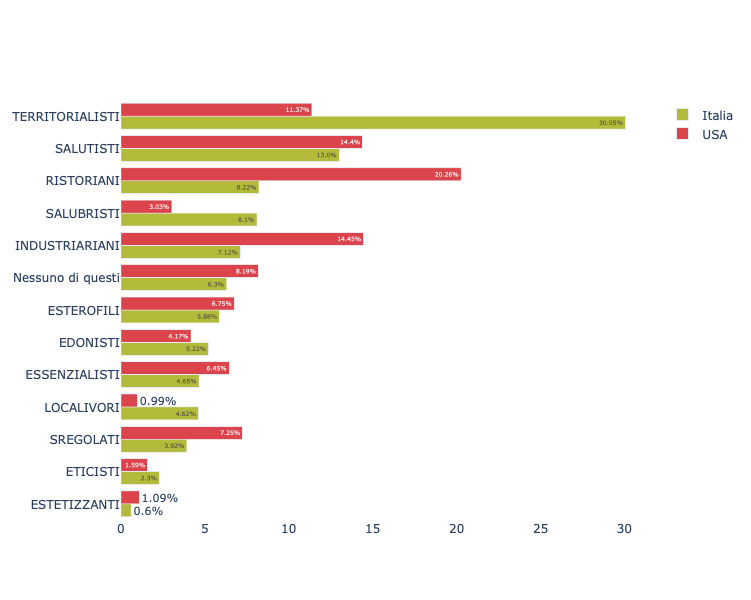

In [164]:
fig = make_bars_plotly(selected_color_theme, grouped)
fig

In [199]:
grouped = df_filtered.groupby(['country', 'q5__4']).country.count()
fixed_order = [
            "Molto aumentato", "Un po’ aumentato", "Uguale",
            "Un po’ diminuito", "Molto diminuito"
        ][::-1]
grouped

country  q5__4           
Italia   Molto aumentato      239
         Molto diminuito      272
         Uguale              2299
         Un po’ aumentato     554
         Un po’ diminuito     636
USA      Molto aumentato      232
         Molto diminuito      136
         Uguale              1017
         Un po’ aumentato     362
         Un po’ diminuito     267
Name: country, dtype: int64

In [203]:
grouped.index.levels[1].sort_values(fixed_order)

(Index(['Molto aumentato', 'Molto diminuito', 'Uguale', 'Un po’ aumentato',
        'Un po’ diminuito'],
       dtype='object', name='q5__4'),
 array([0, 1, 2, 3, 4]))

In [204]:
# Convert the second level of the MultiIndex to a Categorical type with the specified order
grouped.index = grouped.index.set_levels(
    pd.Categorical(grouped.index.levels[1], categories=fixed_order, ordered=True),
    level=1
)

# Then you can simply sort the Series
grouped_sorted = grouped.sort_index(level=1)


In [206]:
color_map = {
        'blue': BLUE,
        'cyan': CYAN,
        'green': GREEN,
        'yellow': YELLOW,
        'red': RED,
        'olive': OLIVE,
        'purple': PURPLE,
        'gold': GOLD
    }

In [208]:
list(color_map.values())

['#006BA2',
 '#3EBCD2',
 '#379A8B',
 '#EBB434',
 '#DB444B',
 '#B4BA39',
 '#9A607F',
 '#D1B07C']